<a href="https://colab.research.google.com/github/enikolaev/MMO/blob/main/12.%20MLP/LabWork12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лаборатороная работа 12. Многослойная нейронная сеть

В качестве классификатора будем использовать `MLPClassifier` - класс библиотеки `sklearn.neural_network`. Данный класс реализует все стадии работы с многослойным персептроном.

In [ ]:
# подключение библиотек
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_circles, make_classification, make_moons
import matplotlib.pyplot as plt

## Содание синтетического набора данных

Обучающий набор данных (множество точек на плоскости). Создадим несколько наборов данных: с использованием методов `make_circles`, `make_classification`, `make_moons`

In [91]:
toy_data = [
    make_classification(n_samples=1000,
                        n_features=2,
                        n_redundant=0,
                        n_informative=2,
                        random_state=1,
                        weights = [0.65],
                        n_clusters_per_class = 2,
                        class_sep=1.5),
    make_circles(n_samples = 1000, noise=0.1, factor=0.2, random_state=1),
    make_moons(n_samples = 1000, noise=0.1, random_state=0)
    ]

Выполним визуализацию полученных наборов

Значения для cmap:
'Pastel1', 'Pastel2', 'Paired', 'Accent', 'Dark2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu','RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic', 'berlin', 'managua', 'vanimo'
и т.д.

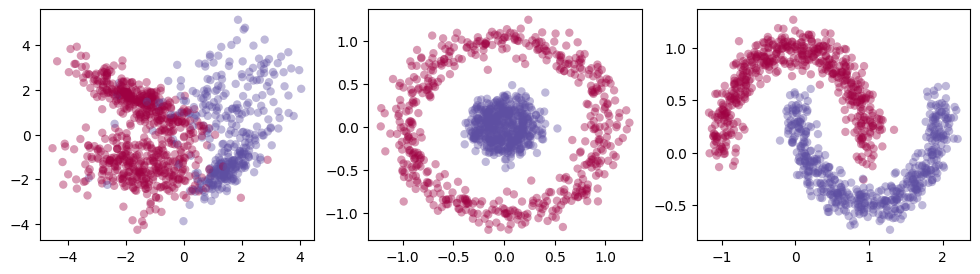

In [92]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,3))
for p, data in zip(enumerate(ax.flat), toy_data):
  X, y = data
  ind, axi = p
  axi.scatter(X[:,0], X[:,1], c=y, cmap = 'Spectral', alpha=0.4, edgecolors='none')
plt.show()

## Классификация на основе искусственной нейронной сети

### Создание классификатора

In [93]:
model1 = MLPClassifier(
    hidden_layer_sizes=[10,20,20,10],
    learning_rate="constant", # constant, invscaling, adaptive
    learning_rate_init = 0.001,
    activation="relu", # identity, logistic, tanh, relu
    solver="adam", # lbfgs, sgd, adam
    alpha=0.0001
    )

Более подробную информацию о параметрах MLPClassifier можно посмотреть [здесь](https://scikit-learn.org/dev/modules/generated/sklearn.neural_network.MLPClassifier.html)

### Обучение классификатора

In [94]:
# Обучение классификатора на синтетическом наборе, полученном с использованием make_classification
X, y = toy_data[0]
model1.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=[10, 20, 20, 10])

### Визуализация области решения классификатора

<Figure size 500x300 with 0 Axes>

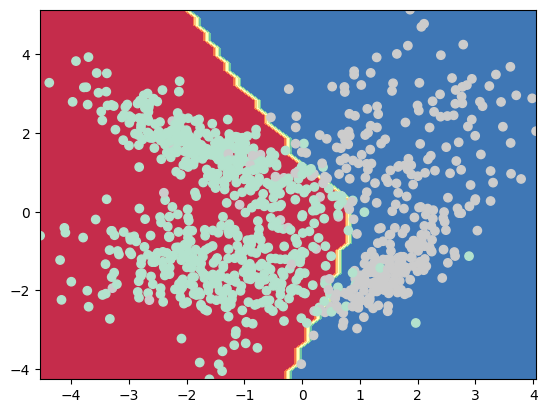

In [95]:
from sklearn.inspection import DecisionBoundaryDisplay
figure = plt.figure(figsize=(5, 3))
feature_1, feature_2 = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max()),
    np.linspace(X[:, 1].min(), X[:, 1].max()))
grid = np.vstack([feature_1.ravel(), feature_2.ravel()]).T
y_pred = np.reshape(model1.predict(grid), feature_1.shape)
display = DecisionBoundaryDisplay(
    xx0=feature_1, xx1=feature_2, response=y_pred
)
display.plot(cmap='Spectral')
display.ax_.scatter(X[:, 0], X[:, 1], c=y, cmap='Pastel2')
plt.show()

### Использование готовой модели

In [98]:
# Предсказание с использованием классификатора для нескольких экземпляров
x_test = [[1.0, 2.0], [-4.0, 0.0], [-3.1, 2.2]]
pred = model1.predict(x_test)
print(pred)

[1 0 0]


## Индивидуальное задание

Выполните индивидуальное задание. Для этого необходимо реализовать следующие этапы:

1.   Реализуйте обучение моделей для синтетических наборов данных различной природы (make_circles, make_moons). Выполните визуализацию границ решения.
2.   Реализуйте несколько моделей искусственных нейронных сетей с различными гипперпараметрами и архитектурами. Сравните области решений обученных моделей.
3.   Реализуйте обучение одной модели нейронной сети с использованием различных алгоритмов оптимизации. Сравните получившиеся области решения.
